# SVD Decomposition Module

## Denoising Noisy Image Frame from File

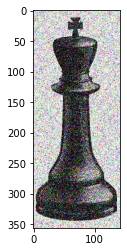

In [41]:
from matplotlib import pyplot as plt
img = plt.imread('noisy.jpg') # read picture from path
plt.imshow(img)
plt.show()


### calculating matrix decomposition

In [42]:
import numpy as np
from numpy import linalg as la
from numpy import matrix as mt
dcm = {
    'U':[0, 0, 0],
    'S':[0, 0, 0],
    'V':[0, 0, 0],
    'R':[0, 0, 0]
}
for i in range(3):
    dcm['U'][i], dcm['S'][i], dcm['V'][i] = la.svd(img[:, :, i])


#### choosing a cuttoff value according to histogram

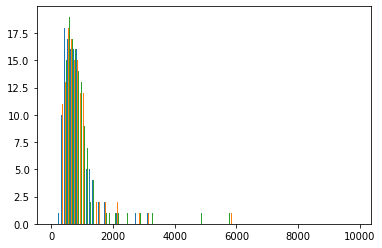

In [43]:
plt.hist(dcm['S'],range(0,10000,100))
plt.show()

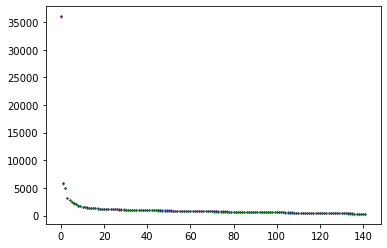

In [44]:
plt.scatter(range(142), dcm['S'][0], color='red', s=1)
plt.scatter(range(142), dcm['S'][1], color='blue', s=1)
plt.scatter(range(142), dcm['S'][2], color='green', s=1)
plt.show()

### Denoising Picture and Recostructing Image by New Sigma matrix

In [45]:
cutoff = [1300,1300,1300]
##
diff = img.shape[0]-img.shape[1]
diff = 0 if(diff < 0) else diff
##
for k in range(3):
    dcm['R'][k] = np.zeros(img.shape[1])
    for i in range(len(dcm['S'][k])):
        dcm['R'][k][i] = dcm['S'][k][i] if(dcm['S'][k][i] > cutoff[k]) else 0
    dcm['R'][k] = np.reshape(np.append(np.diag(dcm['R'][k]), np.zeros((diff, img.shape[1]))),(img.shape[0], img.shape[1]))

In [46]:
new_img = np.full((356,142,3),255);
for k in range(3):
    new_img[:,:,k] = np.matrix(dcm['U'][k])*np.matrix(dcm['R'][k])*np.matrix(dcm['V'][k])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


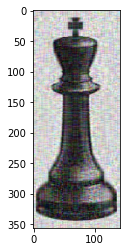

In [47]:
plt.imshow(new_img)
plt.show()

## Surface Denoise

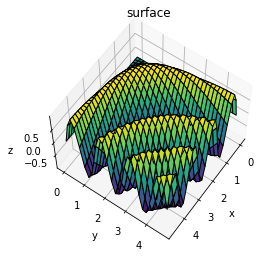

In [48]:
import utility as ut
ut.show_main()

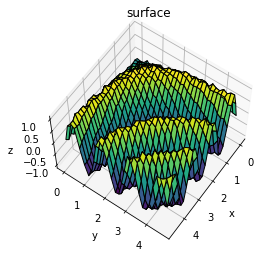

In [49]:
ut.show_noisy()

In [50]:
records = ut.get_function()
records.shape
fdc = {
    'U':0,
    'S':0,
    'V':0,
    'R':0
}
fdc['U'], fdc['S'], fdc['V'] = la.svd(records)


#### choosing a cuttoff value according to scatter

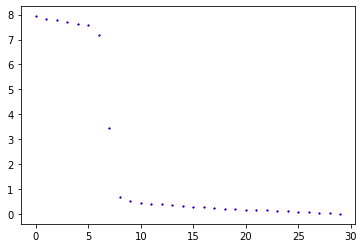

In [51]:
plt.scatter(range(30), fdc['S'], color='red', s=1)
plt.scatter(range(30), fdc['S'], color='blue', s=1)
plt.show()

### Denoising Coordination and Reconstructing Function Coordinations

In [55]:
fcutoff = 10
##
diff = records.shape[0] - records.shape[1]
diff = 0 if(diff < 0) else diff
##
fdc['R'] = np.zeros(records.shape[1])
for i in range(len(fdc['S'])):
    fdc['R'][i] = fdc['S'][i] if(fdc['S'][i] > fcutoff) else 0
fdc['R'] = np.reshape(np.append(np.diag(fdc['R']), np.zeros((diff, records.shape[1]))),(records.shape[0], records.shape[1]))

In [56]:
new_func = np.matrix(fdc['U'])*np.matrix(fdc['R'])*np.matrix(fdc['V'])

#### comparing results

Noisy function:



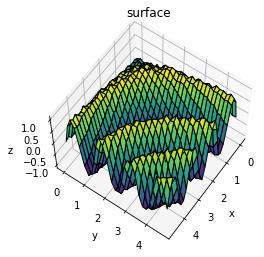

Denoised function:



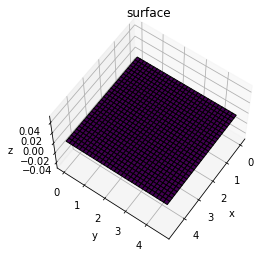

In [57]:
print('Noisy function:\n')
ut.show_noisy()
print('Denoised function:\n')
ut.show_my_matrix(new_func)